In [1]:
pip install pandas pytrends requests matplotlib


Note: you may need to restart the kernel to use updated packages.


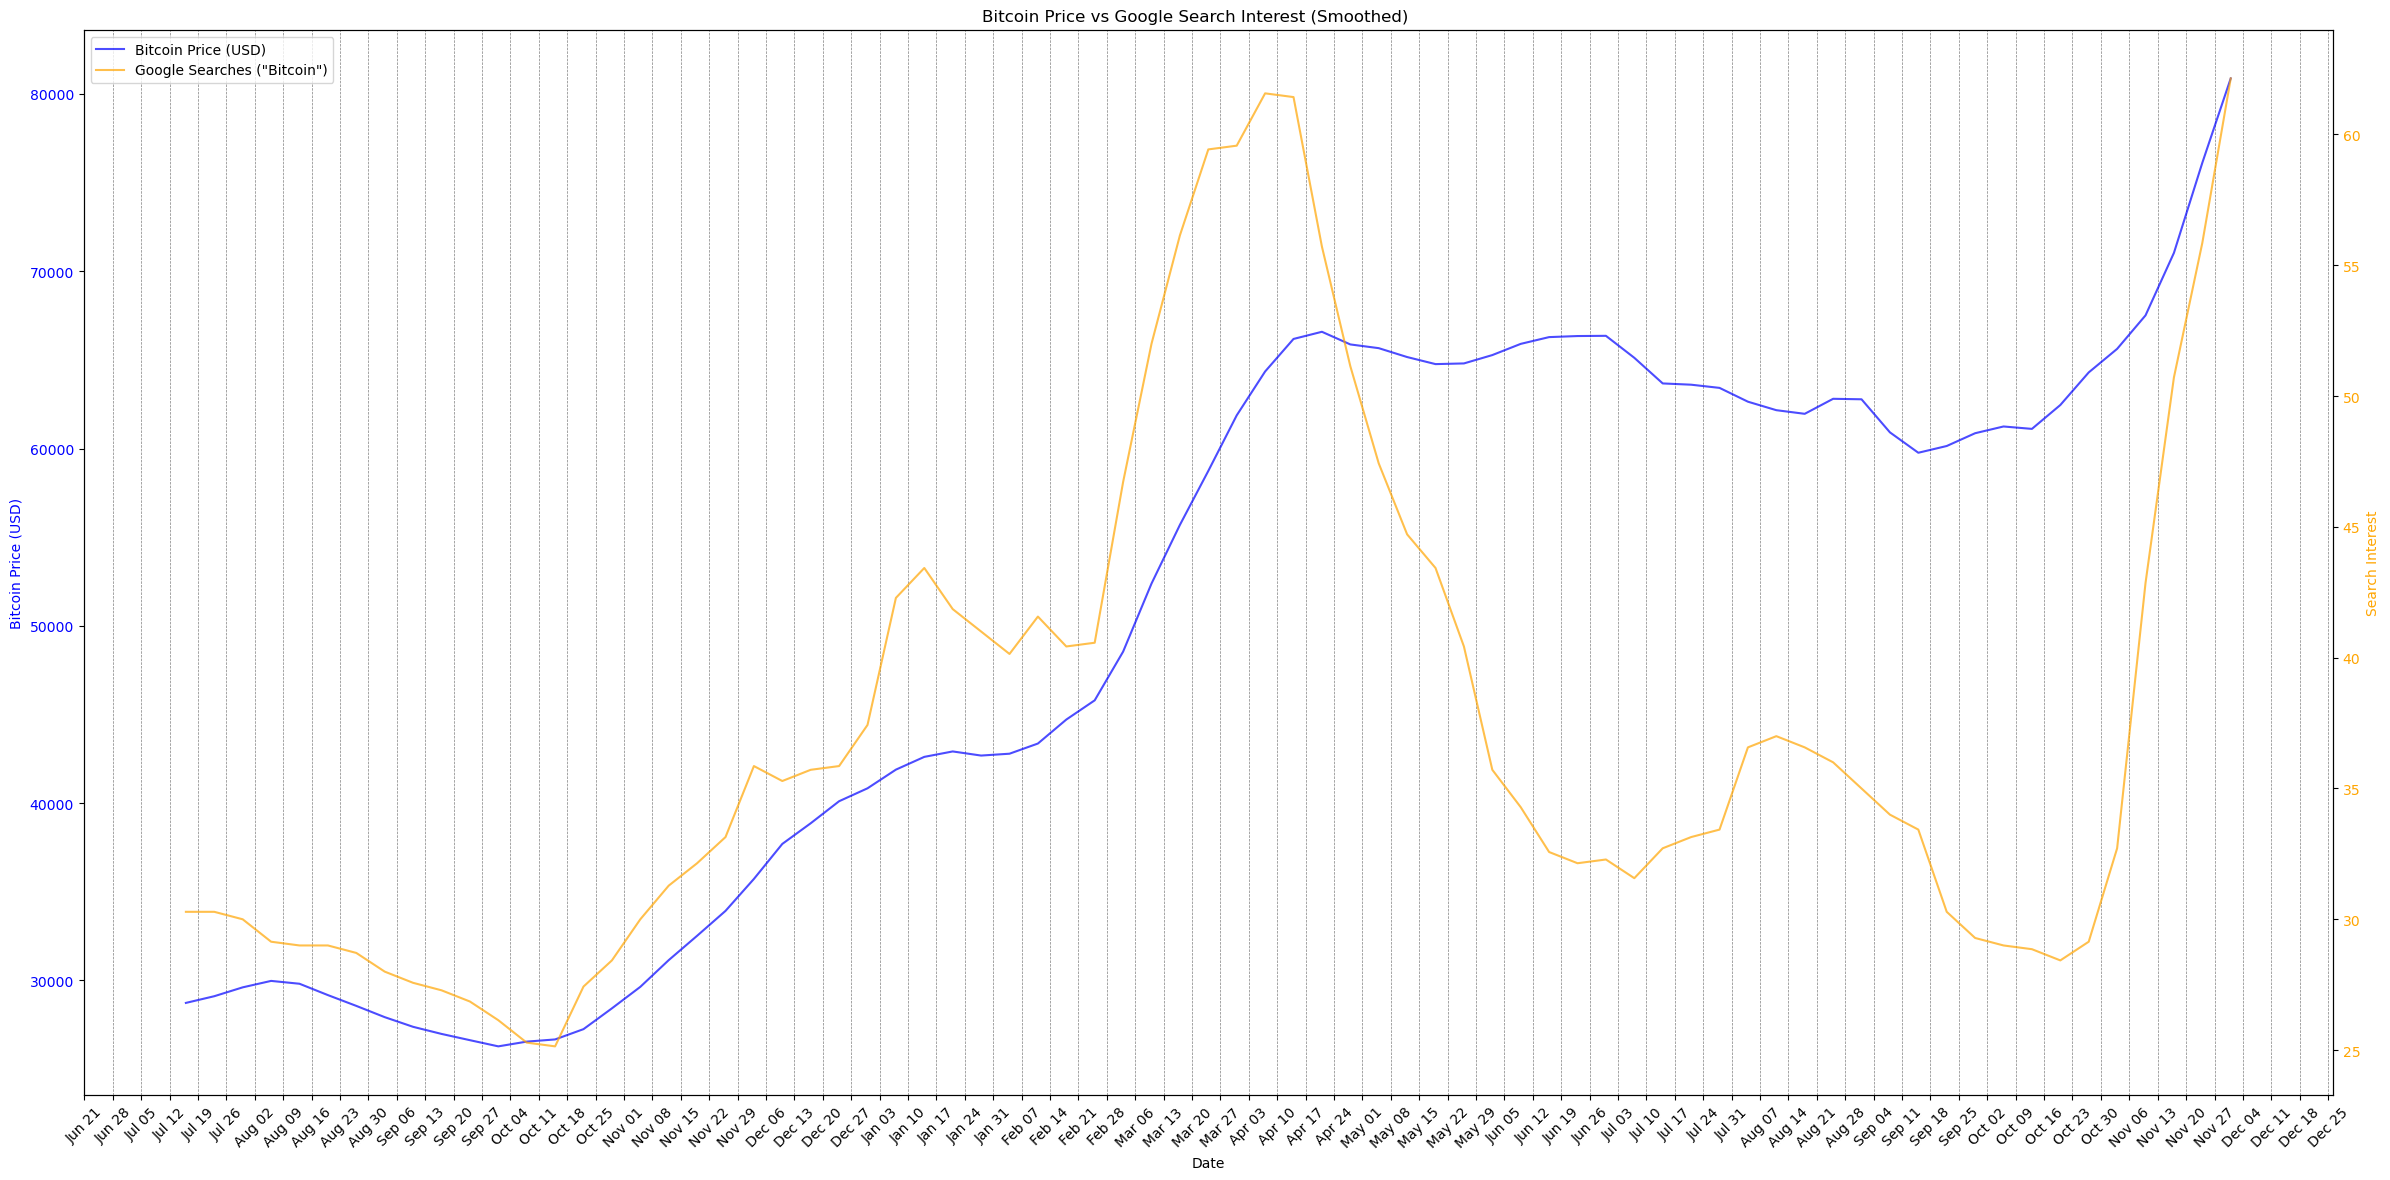

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pytrends.request import TrendReq
from datetime import datetime
import matplotlib.dates as mdates

# Step 1: Download Bitcoin Price Data
def download_bitcoin_prices():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
    start_date = int(datetime(2023, 6, 1).timestamp())  # Change start date
    end_date = int(datetime(2024, 12, 8).timestamp())   # Change end date
    params = {
        "vs_currency": "usd",
        "from": start_date,
        "to": end_date,
    }
    response = requests.get(url, params=params)
    try:
        data = response.json()
        print(data)  # Debugging: Print the response
        if "prices" not in data:
            raise KeyError("'prices' key not found in the API response.")
        prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        prices['date'] = pd.to_datetime(prices['timestamp'], unit='ms').dt.date
        prices.drop('timestamp', axis=1, inplace=True)
        return prices
    except Exception as e:
        print(f"Error fetching Bitcoin prices: {e}")
        print("Response content:", response.content)
        return pd.DataFrame()

bitcoin_prices = download_bitcoin_prices()
if bitcoin_prices.empty:
    print("Bitcoin prices data could not be fetched. Exiting.")
    exit()

# Save to CSV
bitcoin_prices.to_csv('bitcoin_prices.csv', index=False)

# Step 2: Get Google Trends Data
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["bitcoin"]
pytrends.build_payload(kw_list, timeframe='2023-06-01 2024-12-08')

trends_data = pytrends.interest_over_time().reset_index()
trends_data.rename(columns={"date": "date", "bitcoin": "search_interest"}, inplace=True)
trends_data['date'] = trends_data['date'].dt.date  # Convert to date for merging
trends_data.to_csv('google_trends_bitcoin.csv', index=False)

# Step 3: Merge the Data
merged_data = pd.merge(bitcoin_prices, trends_data, on='date', how='inner')

# Step 4: Analyze the Relationship
correlation = merged_data['price'].corr(merged_data['search_interest'])
print(f"Correlation between Bitcoin Price and Google Search Interest: {correlation:.2f}")

# Step 5: Apply a Rolling Average to Smooth the Data
merged_data['price_smooth'] = merged_data['price'].rolling(window=7).mean()
merged_data['search_interest_smooth'] = merged_data['search_interest'].rolling(window=7).mean()

# Step 6: Visualize the Data with Frequent Vertical Gridlines
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plot Bitcoin Price on the primary y-axis
line1, = ax1.plot(merged_data['date'], merged_data['price_smooth'], label='Bitcoin Price (USD)', color='blue', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add vertical gridlines with daily or weekly intervals
ax1.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks every 7 days (weekly)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format to show month and day
ax1.tick_params(axis='x', rotation=45)  # Rotate ticks for readability

# Create a secondary y-axis for Google Search Interest
ax2 = ax1.twinx()
line2, = ax2.plot(merged_data['date'], merged_data['search_interest_smooth'], label='Google Searches ("Bitcoin")', color='orange', alpha=0.7)
ax2.set_ylabel('Search Interest', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a combined legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Add title
fig.suptitle('Bitcoin Price vs Google Search Interest (Smoothed)')
fig.tight_layout()
plt.show()


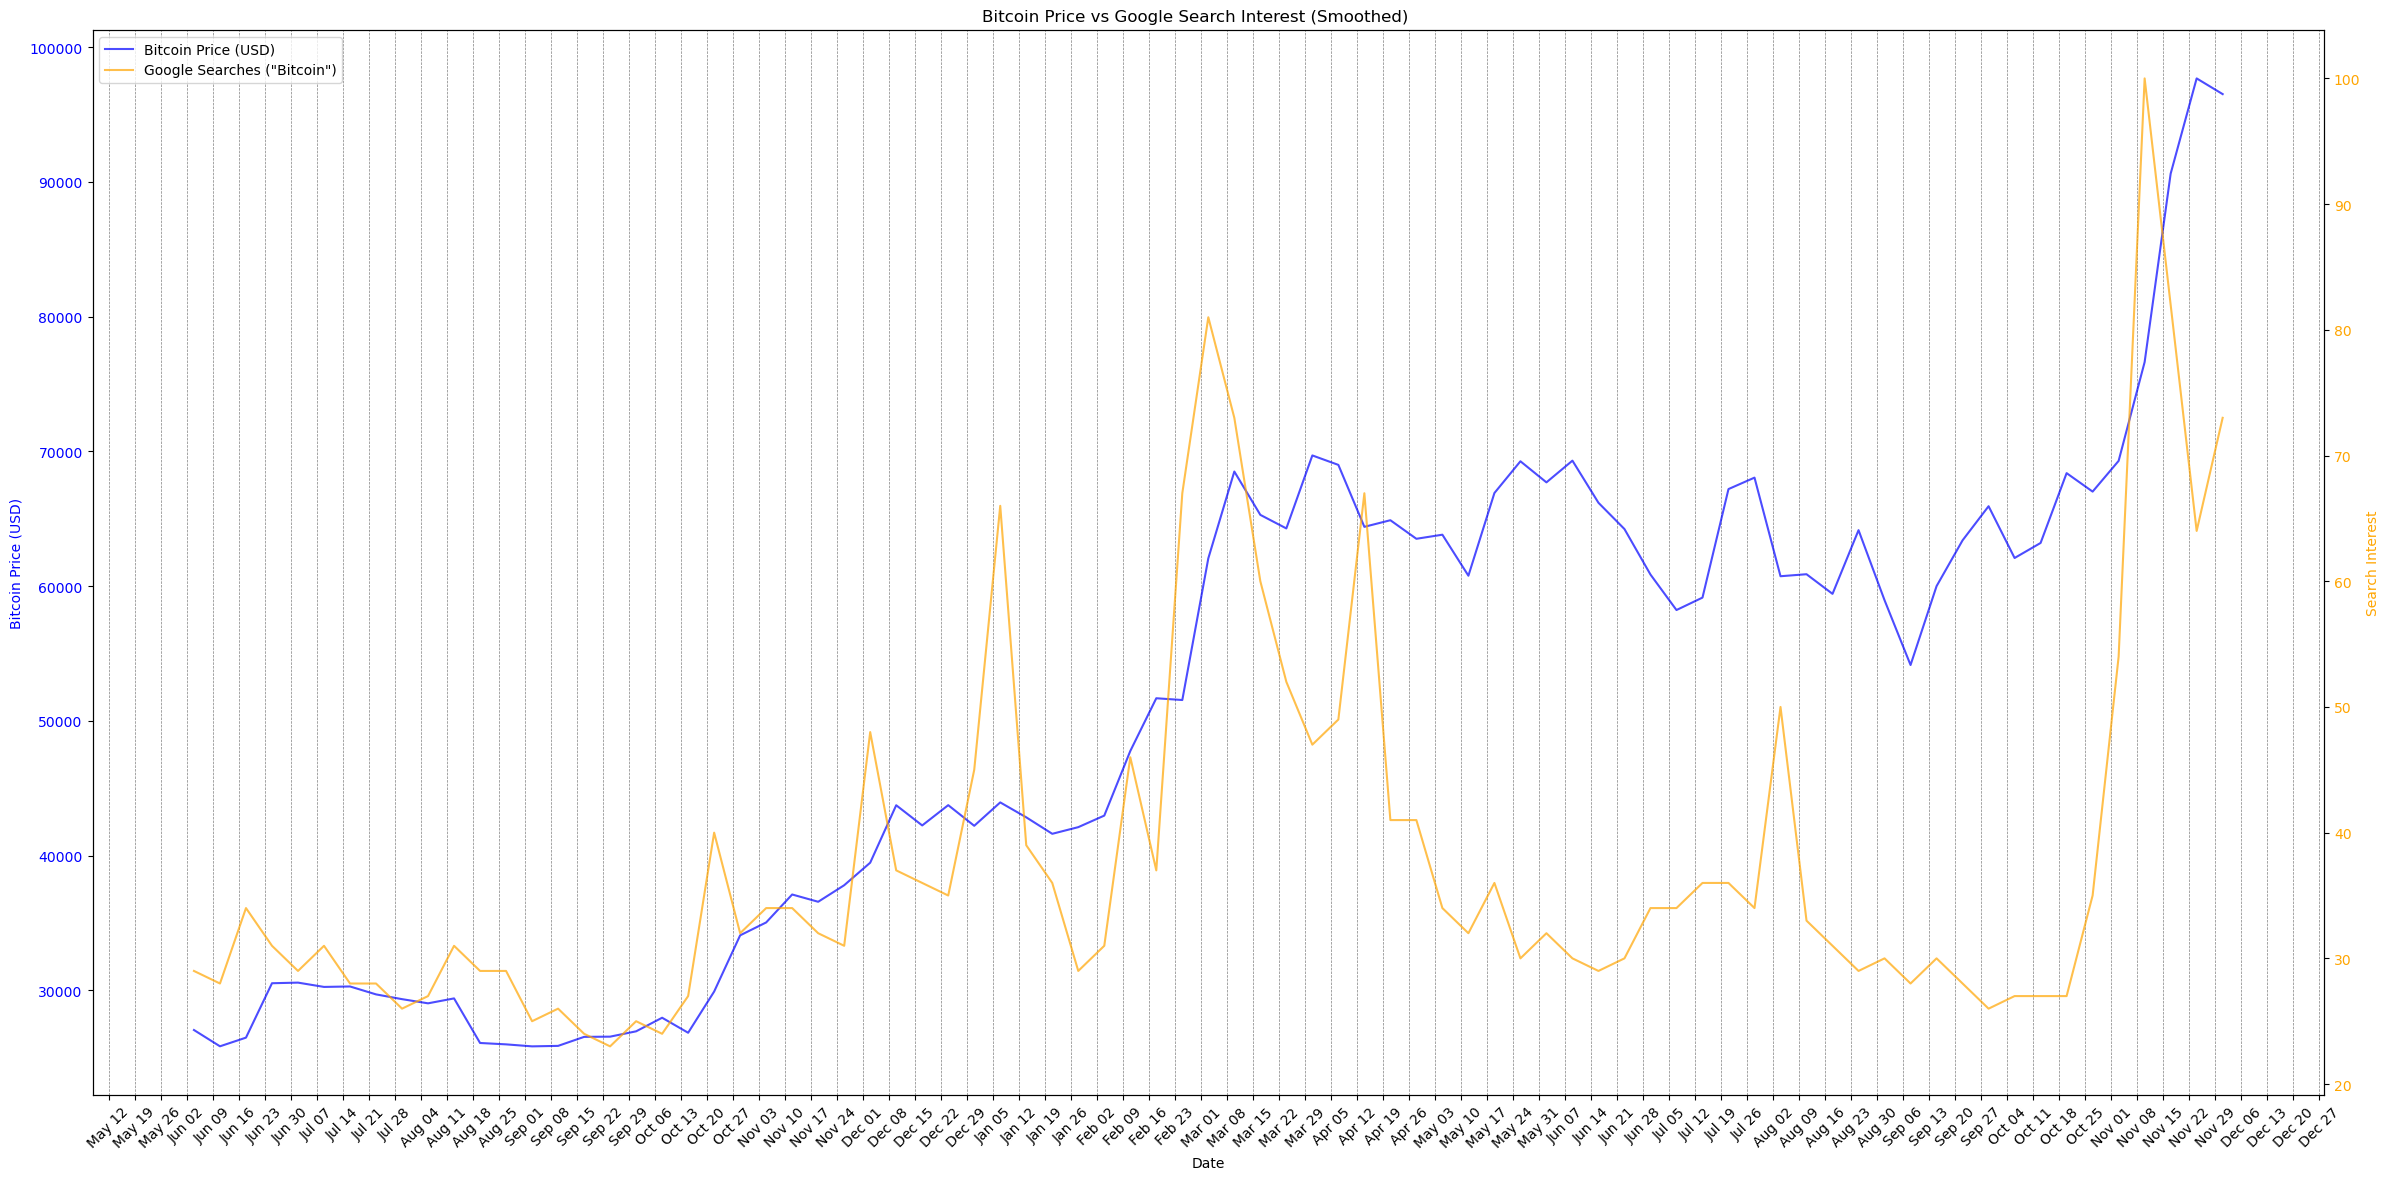

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pytrends.request import TrendReq
from datetime import datetime
import matplotlib.dates as mdates

# Step 1: Download Bitcoin Price Data
def download_bitcoin_prices():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
    start_date = int(datetime(2023, 6, 1).timestamp())  # Change start date
    end_date = int(datetime(2024, 12, 8).timestamp())   # Change end date
    params = {
        "vs_currency": "usd",
        "from": start_date,
        "to": end_date,
    }
    response = requests.get(url, params=params)
    try:
        data = response.json()
        print(data)  # Debugging: Print the response
        if "prices" not in data:
            raise KeyError("'prices' key not found in the API response.")
        prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        prices['date'] = pd.to_datetime(prices['timestamp'], unit='ms').dt.date
        prices.drop('timestamp', axis=1, inplace=True)
        return prices
    except Exception as e:
        print(f"Error fetching Bitcoin prices: {e}")
        print("Response content:", response.content)
        return pd.DataFrame()

bitcoin_prices = download_bitcoin_prices()
if bitcoin_prices.empty:
    print("Bitcoin prices data could not be fetched. Exiting.")
    exit()

# Save to CSV
bitcoin_prices.to_csv('bitcoin_prices.csv', index=False)

# Step 2: Get Google Trends Data
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["bitcoin"]
pytrends.build_payload(kw_list, timeframe='2023-06-01 2024-12-08')

trends_data = pytrends.interest_over_time().reset_index()
trends_data.rename(columns={"date": "date", "bitcoin": "search_interest"}, inplace=True)
trends_data['date'] = trends_data['date'].dt.date  # Convert to date for merging
trends_data.to_csv('google_trends_bitcoin.csv', index=False)

# Step 3: Merge the Data
merged_data = pd.merge(bitcoin_prices, trends_data, on='date', how='inner')

# Step 4: Analyze the Relationship
correlation = merged_data['price'].corr(merged_data['search_interest'])
print(f"Correlation between Bitcoin Price and Google Search Interest: {correlation:.2f}")



# Step 6: Visualize the Data with Frequent Vertical Gridlines
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plot Bitcoin Price on the primary y-axis
line1, = ax1.plot(merged_data['date'], merged_data['price'], label='Bitcoin Price (USD)', color='blue', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add vertical gridlines with daily or weekly intervals
ax1.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks every 7 days (weekly)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format to show month and day
ax1.tick_params(axis='x', rotation=45)  # Rotate ticks for readability

# Create a secondary y-axis for Google Search Interest
ax2 = ax1.twinx()
line2, = ax2.plot(merged_data['date'], merged_data['search_interest'], label='Google Searches ("Bitcoin")', color='orange', alpha=0.7)
ax2.set_ylabel('Search Interest', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a combined legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Add title
fig.suptitle('Bitcoin Price vs Google Search Interest (Smoothed)')
fig.tight_layout()
plt.show()
